In [2]:
from svd_tool import plot_singular
from svd_tool import plot_ce_index
from svd_tool import analysis_u
from svd_tool import macro_analysis
from svd_tool import micro_analysis_jac
from svd_tool import micro_analysis_ig
from svd_tool import dgbd_ce
from svd_tool import save_cg
from svd_tool import save_macro

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

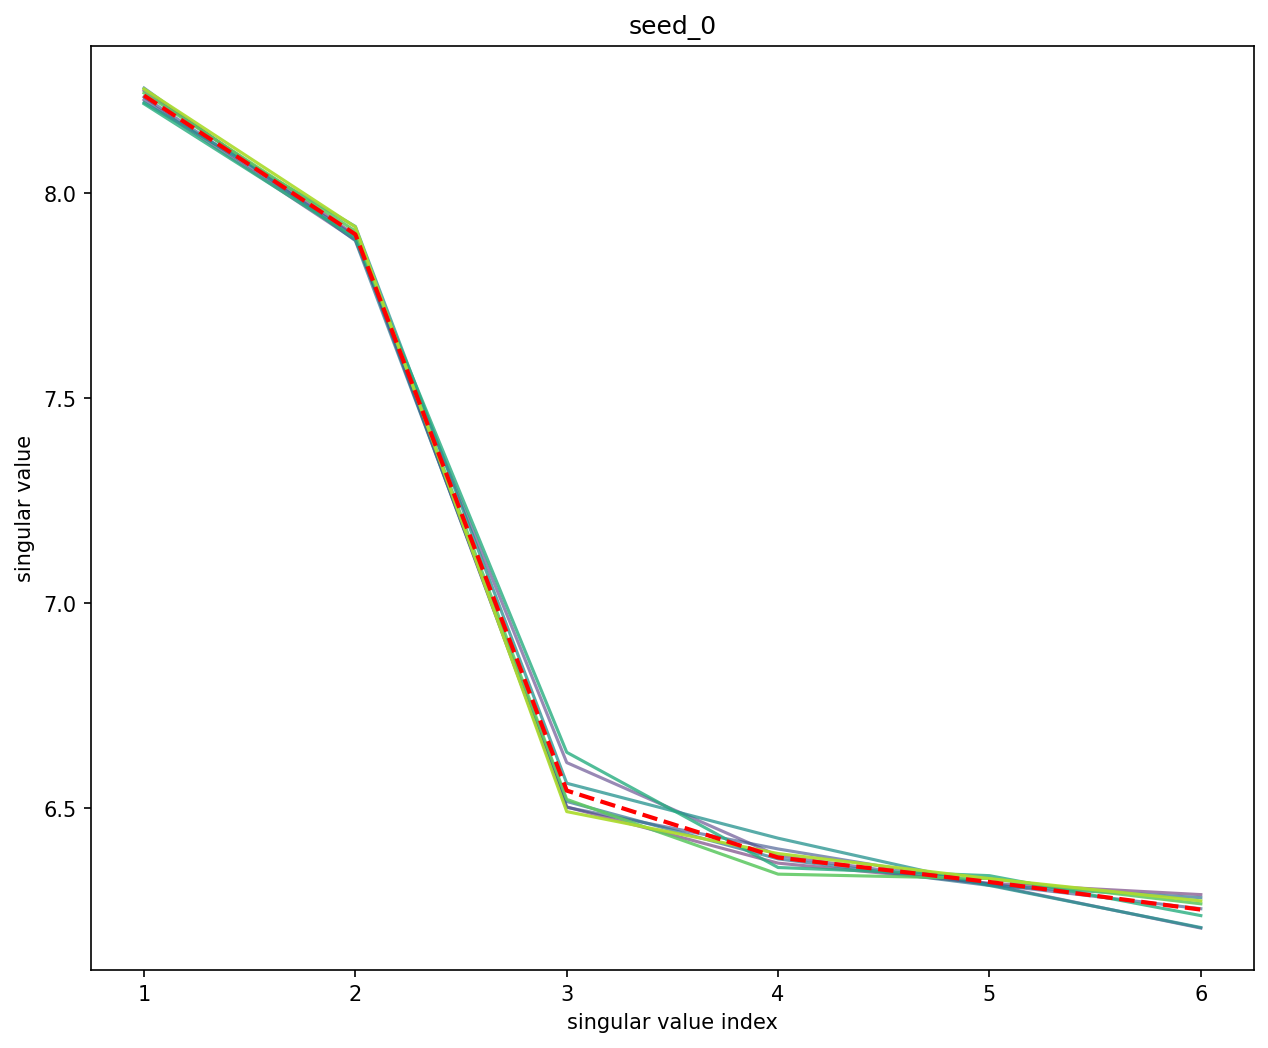

In [3]:
test_id = 'long_term_forecast_lorzen_10000_no_noise_NN_Lorzen_ft-1_sl1_pl1_dm128_nh8_el2_dl1_df2048_fc1_flocnormal_dtTrue_Exp_'
start = 1000
end = 9000
interval = 1000
seq_len = 1
singular, us, vts, mats, Sigs = plot_singular(test_id, seed = 1, start=start, end=end, interval=interval, log_bool=True)

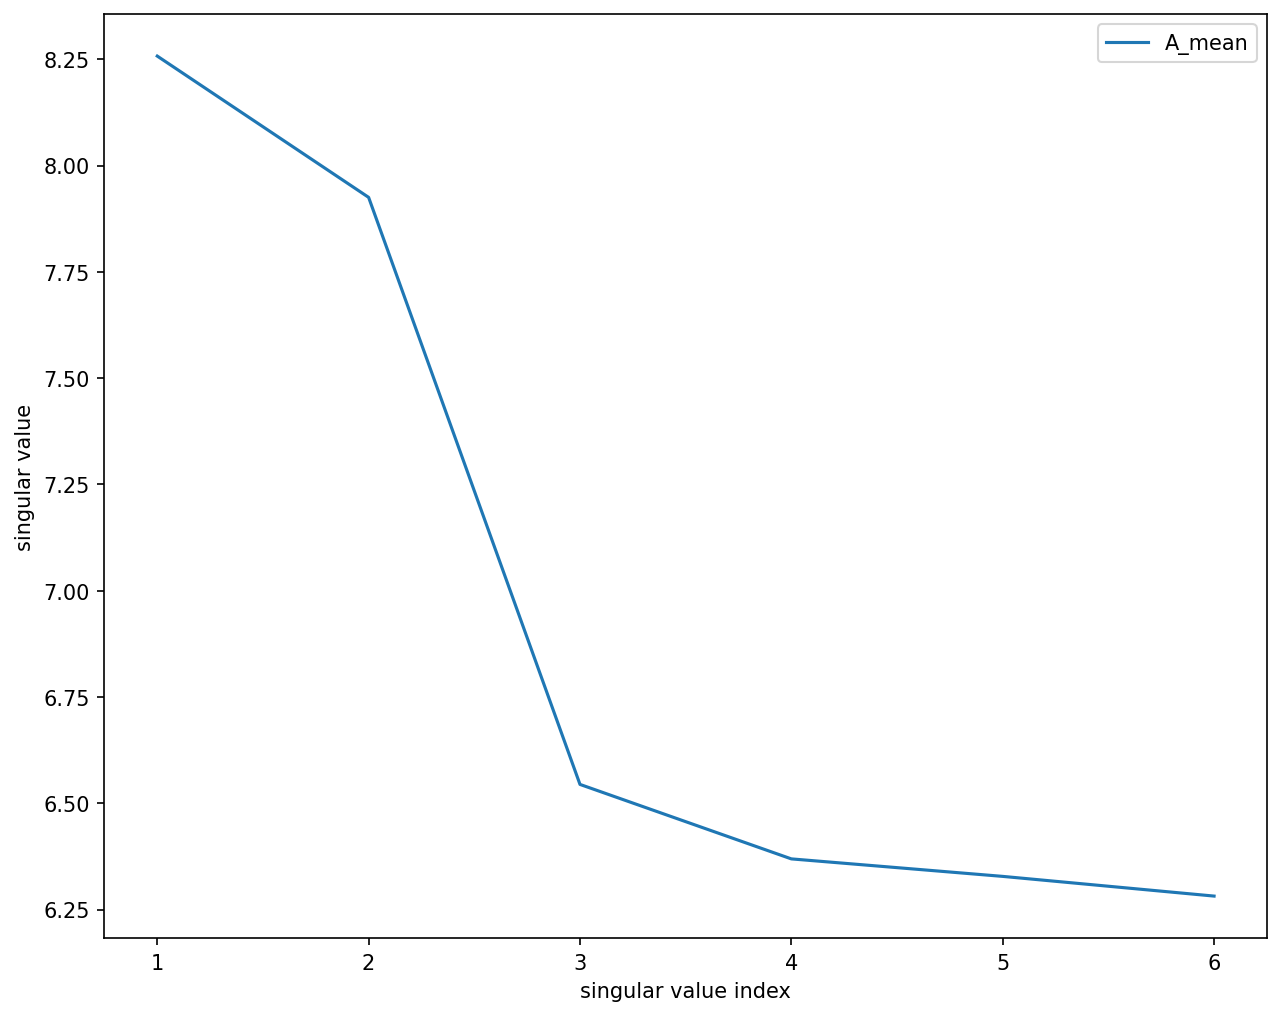

In [8]:
from svd_tool import svd_jacs
from svd_tool import cal_W

def plot_singular2(test_id_first, micro_dims=6, seed = 0, start=1, end=1000, interval=1, abs_bool=False):
    singular, us, vts, mats, Sigs = svd_jacs(test_id_first, start, end, interval, seed, abs_bool)
    num_lines = (end - start) // interval + 1
    plt.figure(figsize=(10,8),dpi=150)
    jac_arrs = np.zeros([num_lines, micro_dims, micro_dims])
    sig_arrs = np.zeros([num_lines, micro_dims, micro_dims])
    for idx, i in enumerate(range(start, end, interval)):
        jac_arrs[idx,:, :] = np.array(mats[i][0])
        sig_arrs[idx,:, :] = np.array(Sigs[i][0])
    jac_mean = np.mean(jac_arrs, axis=0)
    sigma_mean = np.mean(sig_arrs, axis=0)
    U2U, S2, V2T = cal_W(jac_mean, sigma_mean, abs_bool=False)
    S_log = np.log(S2)
    
    plt.plot([j+1 for j in range(len(S_log))], S_log , label=f'A_mean')

    plt.xlabel('singular value index')
    plt.ylabel('singular value')
    plt.legend()
    plt.show()

    return singular, us, vts, mats, Sigs

setting = 'long_term_forecast_lorzen_10000_no_noise_NN_Lorzen_ft-1_sl1_pl1_dm128_nh8_el2_dl1_df2048_fc1_flocnormal_dtTrue_Exp_'
start = 1000
end = 9000
interval = 1000
seq_len = 1
singular, us, vts, mats, Sigs = plot_singular2(setting, seed = 1, start=start, end=end, interval=interval)

(6, 6) (6, 6)


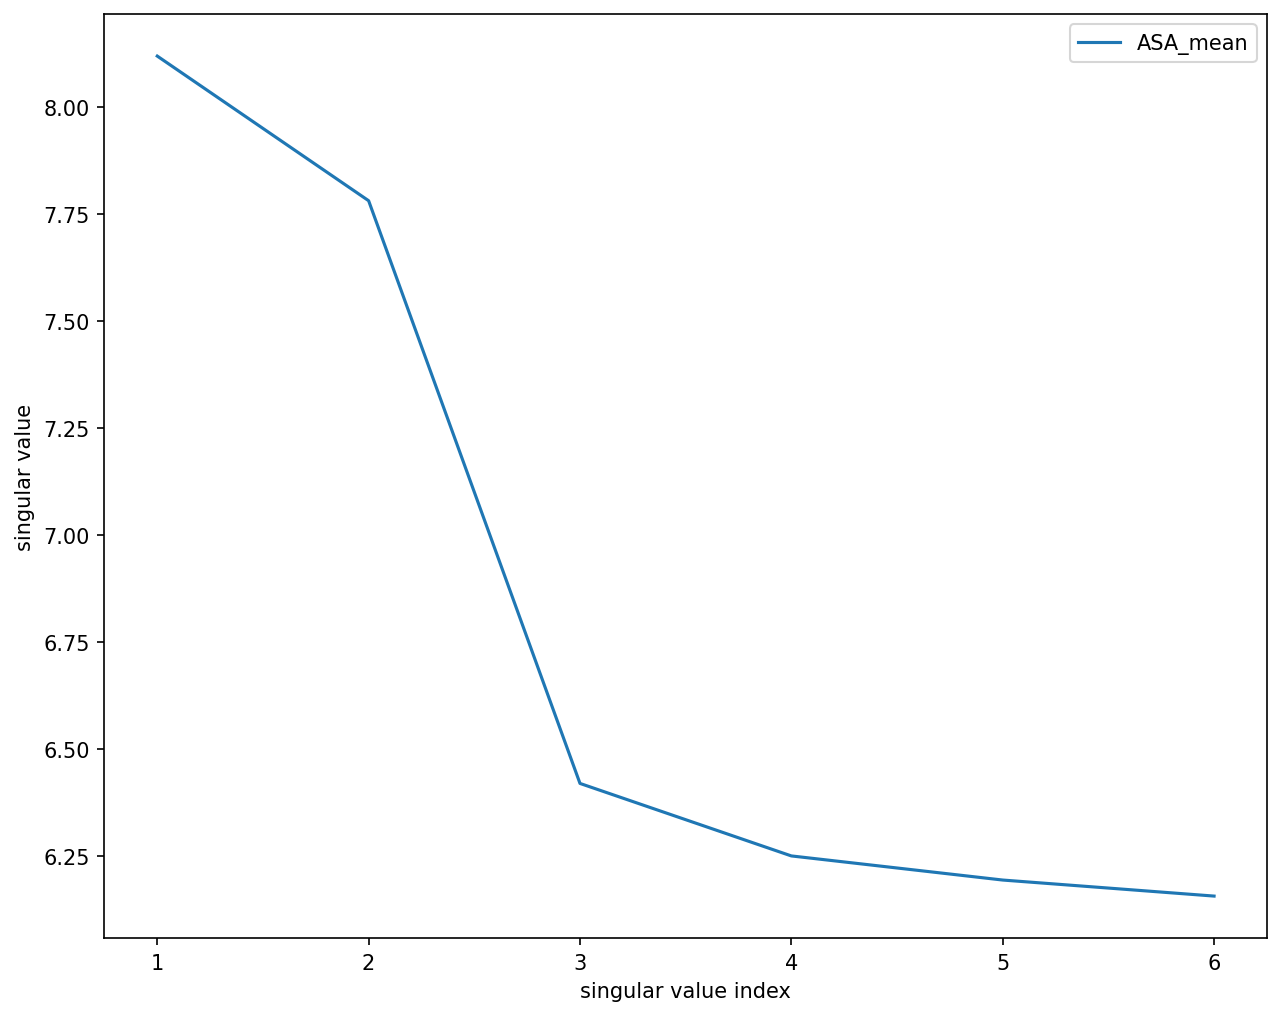

In [12]:
from svd_tool import svd_jacs
from svd_tool import cal_W
from svd_tool import create_block_diagonal_matrix

def cal_W_mean(matrix_a, matrix_b, abs_bool=False):
    n = matrix_a.shape[0]
    block_matrix = create_block_diagonal_matrix(matrix_a, matrix_b)
    U, S, VT = np.linalg.svd(block_matrix)
    
    U2 = U[:n,:] + U[n:,:]
    U2 = U2 @ np.diag(S)
    U2U, S2, V2T = np.linalg.svd(U2)
    if abs_bool:
        U2U = np.abs(U2U)
    return U2U, S2, V2T

def plot_singular3(test_id_first, micro_dims=6, seed = 0, start=1, end=1000, interval=1, abs_bool=False):
    singular, us, vts, mats, Sigs = svd_jacs(test_id_first, start, end, interval, seed, abs_bool)
    num_lines = (end - start) // interval + 1
    plt.figure(figsize=(10,8),dpi=150)
    ma_arrs = np.zeros([num_lines, micro_dims, micro_dims])
    mb_arrs = np.zeros([num_lines, micro_dims, micro_dims])
    for idx, i in enumerate(range(start, end, interval)):
        Sigma_pinv = np.linalg.inv(Sigs[i][0]) #np.linalg.pinv(Sigma, rcond=1e-15)
        matrix_a = np.conj(mats[i][0]).T @ Sigma_pinv @ mats[i][0]
        matrix_b = Sigma_pinv
        ma_arrs[idx,:, :] = matrix_a
        mb_arrs[idx,:, :] = matrix_b
    ma_mean = np.mean(ma_arrs, axis=0)
    mb_mean = np.mean(mb_arrs, axis=0)
    print(ma_mean.shape, mb_mean.shape)
    U2U, S2, V2T = cal_W_mean(ma_mean, mb_mean, abs_bool=False)
    S_log = np.log(S2)

    plt.plot([j+1 for j in range(len(S_log))], S_log , label=f'ASA_mean')

    plt.xlabel('singular value index')
    plt.ylabel('singular value')
    plt.legend()
    plt.show()
    
    return singular, us, vts, mats, Sigs

setting = 'long_term_forecast_lorzen_10000_no_noise_NN_Lorzen_ft-1_sl1_pl1_dm128_nh8_el2_dl1_df2048_fc1_flocnormal_dtTrue_Exp_'
start = 1000
end = 9000
interval = 1000
seq_len = 1
singular, us, vts, mats, Sigs = plot_singular3(setting, seed = 1, start=start, end=end, interval=interval)

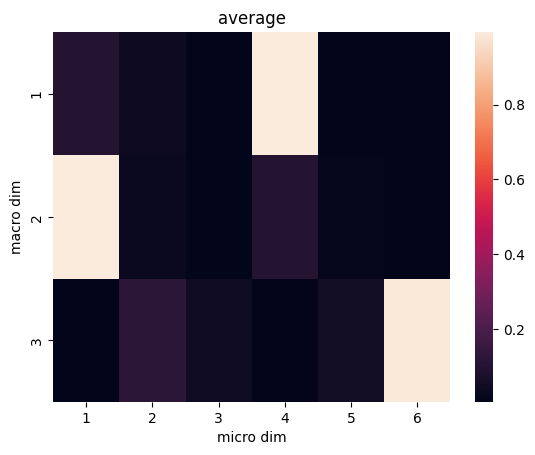

In [13]:
micro_dims = 6
macro_dims = 3
cg_mat_abs = analysis_u(us, micro_dims, start, end, interval, macro_dim=macro_dims, seq_len=1, abs_bool=True, mean_bool=True, show_bool=False)

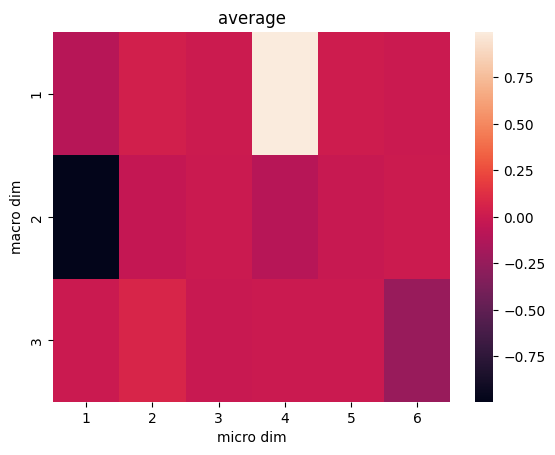

In [14]:
micro_dims = 6
macro_dims = 3
cg_mat = analysis_u(us, micro_dims, start, end, interval, macro_dim=macro_dims, seq_len=1, abs_bool=False, mean_bool=True, show_bool=False)

In [16]:
micro_path ="../dataset/Lorzen/data_10000_no_noise.csv"
macro_path = f"../dataset/Lorzen/macro_{macro_dims}.npy"
save_macro(cg_mat, macro_dims, micro_path, macro_path, one_serie=True)

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/Lorzen/data_10000_no_noise.npy'

YMZ

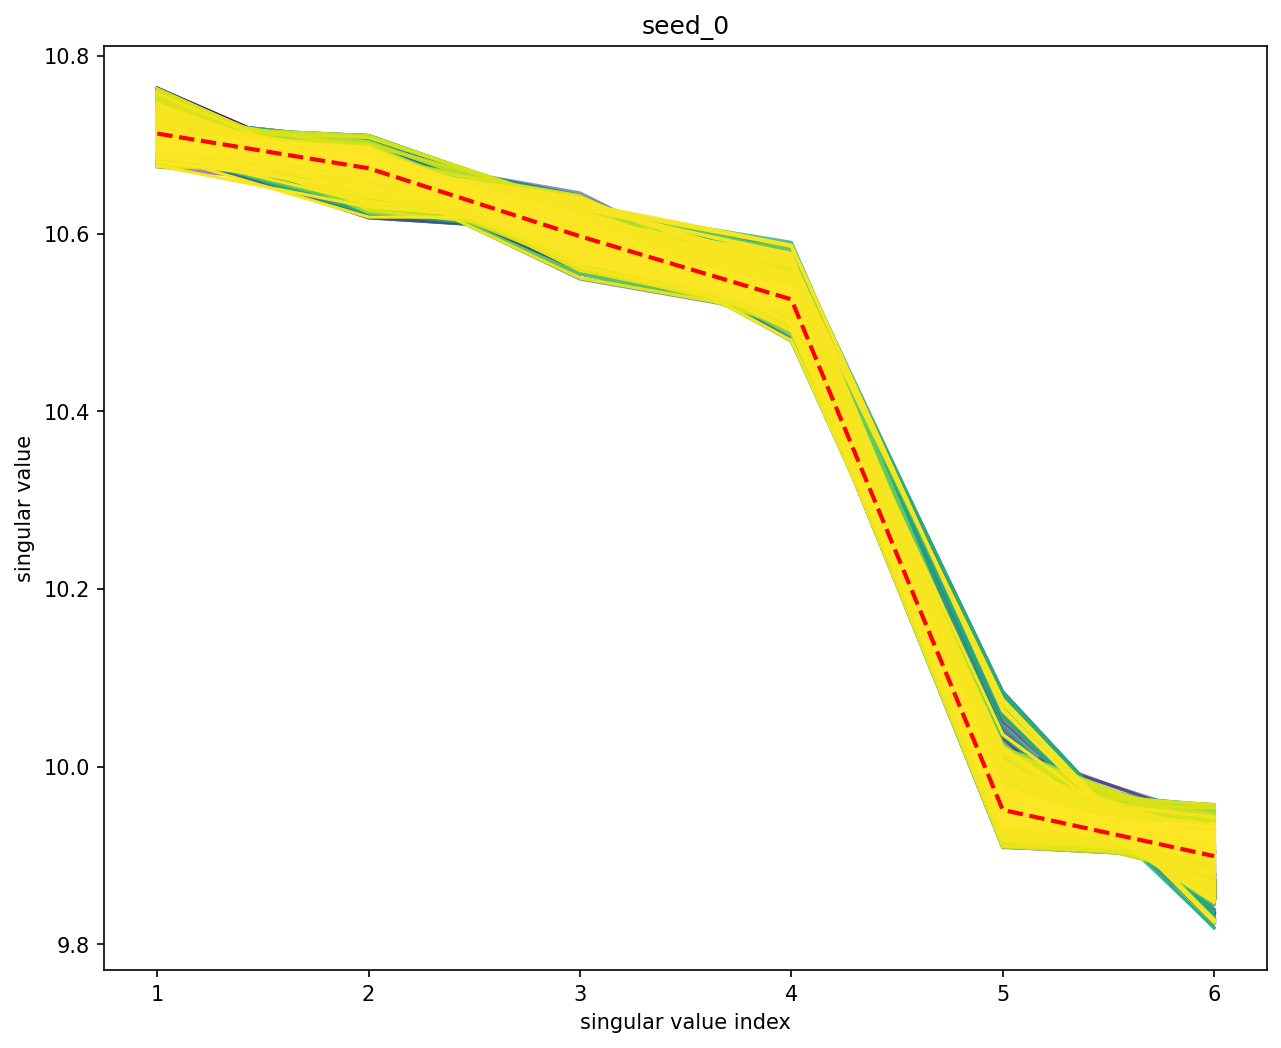

In [5]:
test_id = 'long_term_forecast_datascaleF_ymz_noise001_NN_Lorzen_ft-1_sl1_pl1_dm128_nh8_el2_dl1_df2048_fc1_flocnormal_dtTrue_Exp_'
start = 1
end = 9998
interval = 1
seq_len = 1
singular, us, vts, mats, Sigs = plot_singular(test_id, seed = 1, start=start, end=end, interval=interval, log_bool=True)

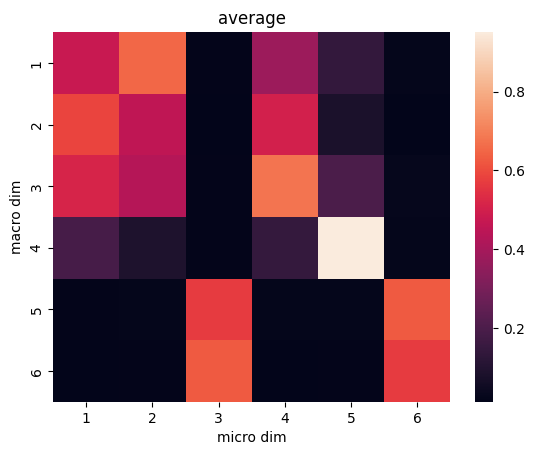

In [6]:
micro_dims = 6
macro_dims = 6
cg_mat_abs = analysis_u(us, micro_dims, start, end, interval, macro_dim=macro_dims, seq_len=1, abs_bool=True, mean_bool=True, show_bool=False)

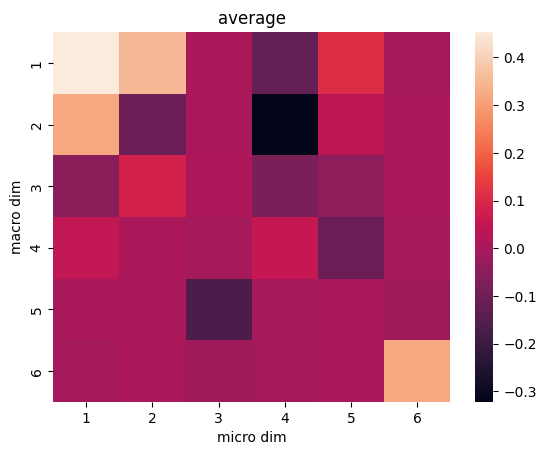

In [7]:
micro_dims = 6
macro_dims = 6
cg_mat = analysis_u(us, micro_dims, start, end, interval, macro_dim=macro_dims, seq_len=1, abs_bool=False, mean_bool=True, show_bool=False)

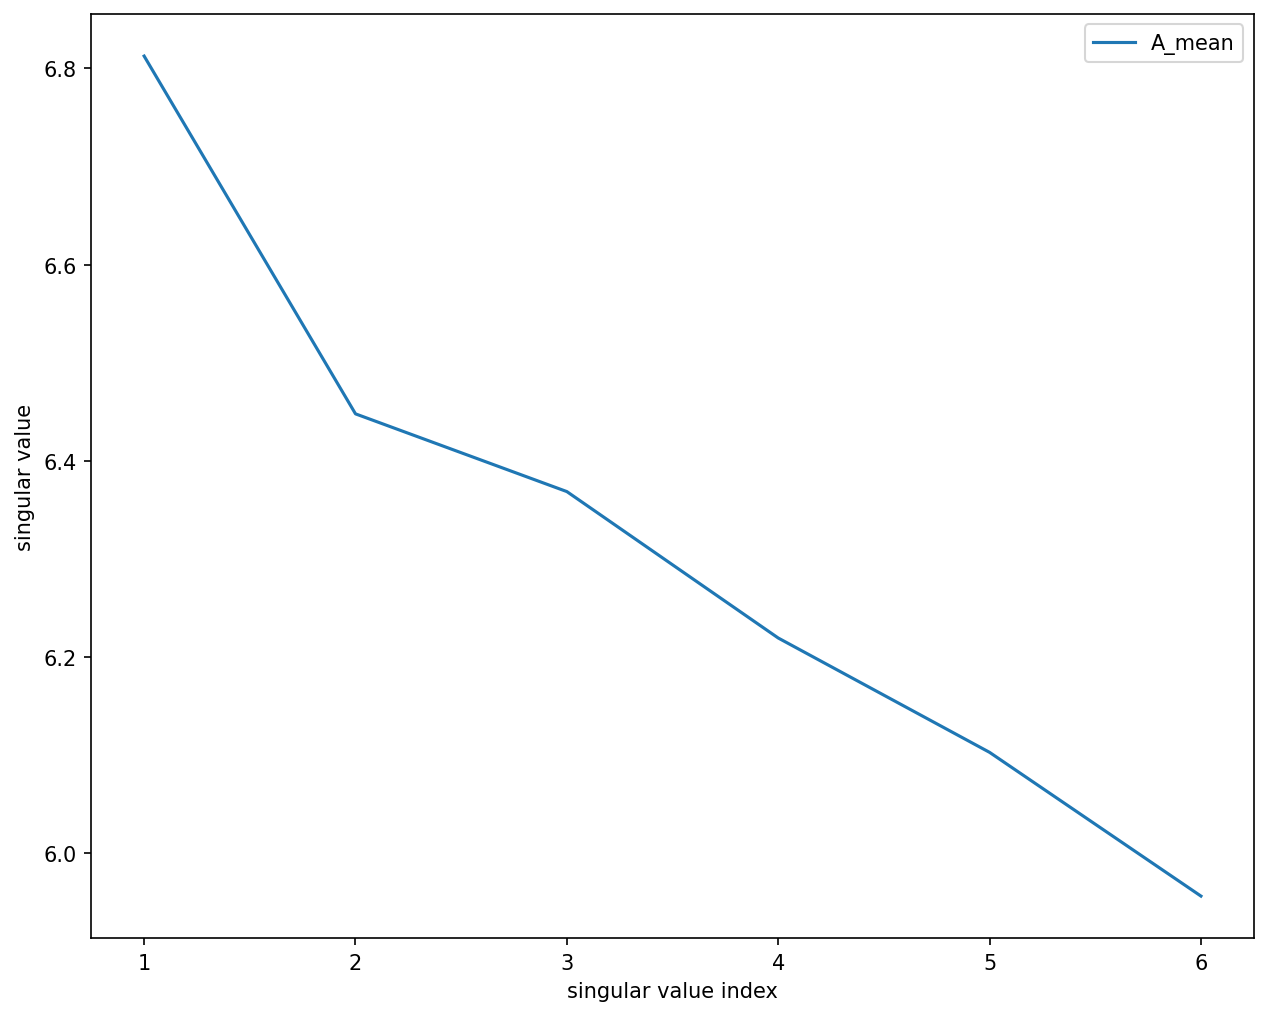

In [4]:
from svd_tool import svd_jacs
from svd_tool import cal_W

def plot_singular2(test_id_first, micro_dims=6, seed = 0, start=1, end=1000, interval=1, abs_bool=False):
    singular, us, vts, mats, Sigs = svd_jacs(test_id_first, start, end, interval, seed, abs_bool)
    num_lines = (end - start) // interval + 1
    plt.figure(figsize=(10,8),dpi=150)
    jac_arrs = np.zeros([num_lines, micro_dims, micro_dims])
    sig_arrs = np.zeros([num_lines, micro_dims, micro_dims])
    for idx, i in enumerate(range(start, end, interval)):
        jac_arrs[idx,:, :] = np.array(mats[i][0])
        sig_arrs[idx,:, :] = np.array(Sigs[i][0])
    jac_mean = np.mean(jac_arrs, axis=0)
    sigma_mean = np.mean(sig_arrs, axis=0)
    U2U, S2, V2T = cal_W(jac_mean, sigma_mean, abs_bool=False)
    S_log = np.log(S2)
    
    plt.plot([j+1 for j in range(len(S_log))], S_log , label=f'A_mean')

    plt.xlabel('singular value index')
    plt.ylabel('singular value')
    plt.legend()
    plt.show()

    return singular, us, vts, mats, Sigs

setting = 'long_term_forecast_lorzen_10000_no_noise_NN_Lorzen_ft-1_sl1_pl1_dm128_nh8_el2_dl1_df2048_fc1_flocnormal_dtTrue_Exp_'
start = 1000
end = 9000
interval = 1000
seq_len = 1
singular, us, vts, mats, Sigs = plot_singular2(setting, seed = 1, start=start, end=end, interval=interval)